### Summary

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA; The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Importing Required Libraries

In [1]:
#Data Manipulation And Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
from plotly.offline import iplot


# Machine Learning model Building and Evaluation
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib


# Read The Dataset

In [2]:
# Here i am importing the dataset from my resource that has been in the csv formate.

data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\CodeClause\Fraud Detedction Project\Dataset\creditcard.csv")
pd.set_option("display.max_columns",None)
data.head(16)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Data Cleaning

In [3]:
#Checking the dataset dimensionality

data.shape

(284807, 31)

In [4]:
#checking dataset what type of data is contain which has a categorical or numerical

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

So here the data has been in numerical formate, no need to check misformating in the dataset

In [5]:
data[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


#### Let's check if there is eany missing data

In [6]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 There is no missing data in the entire dataset.

#### Let's check data unbalance with respect with target value, i.e. Class.

In [7]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In this dataset, a value of 0 represents a legitimate transaction, while 1 indicates a fraudulent one.

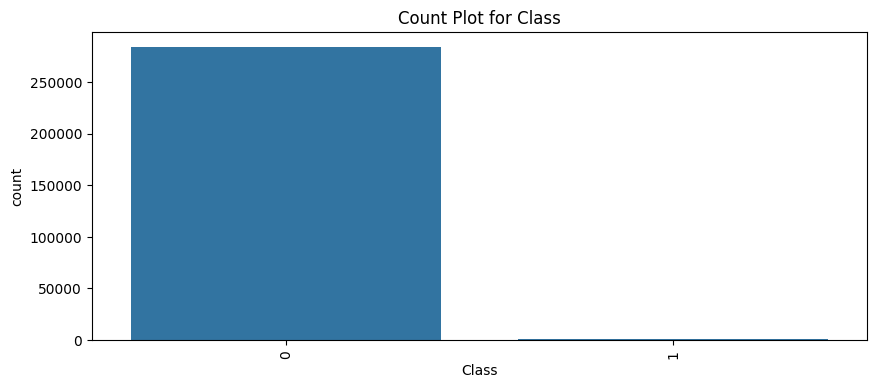

In [8]:
#visualization for class label which is highest 

plt.figure(figsize=(10, 4))
sns.countplot(x=data['Class'])
plt.xticks(rotation=90)
plt.title(f'Count Plot for Class')
plt.show()


In [9]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

#### Skewness checking

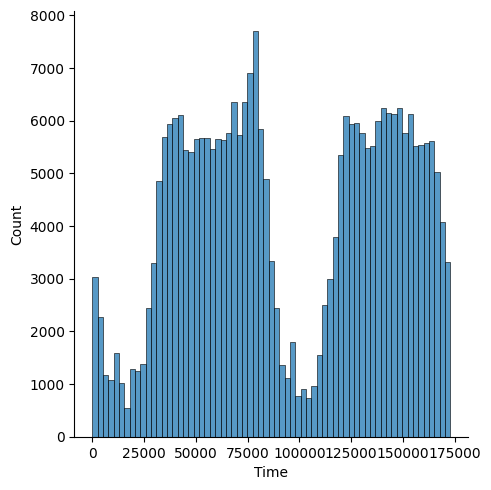

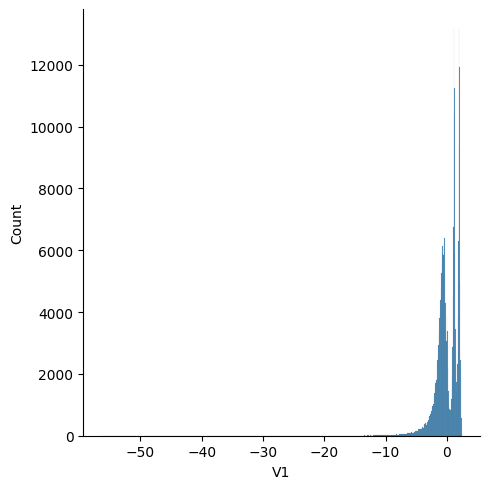

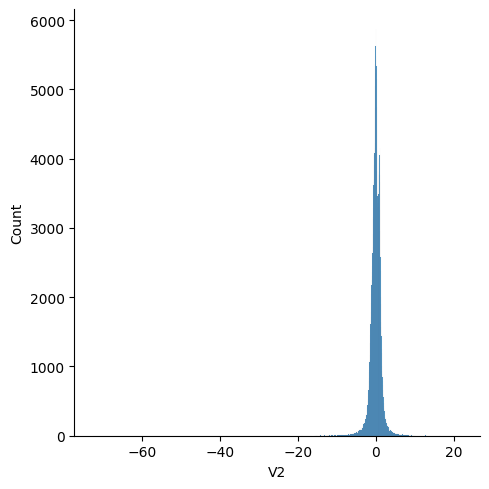

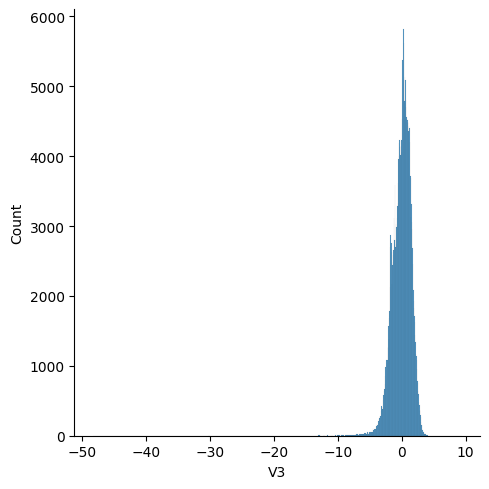

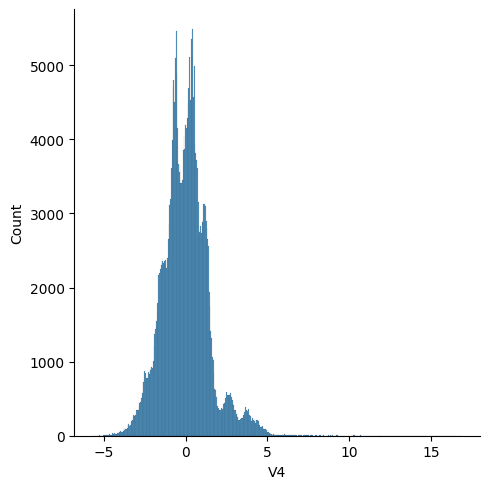

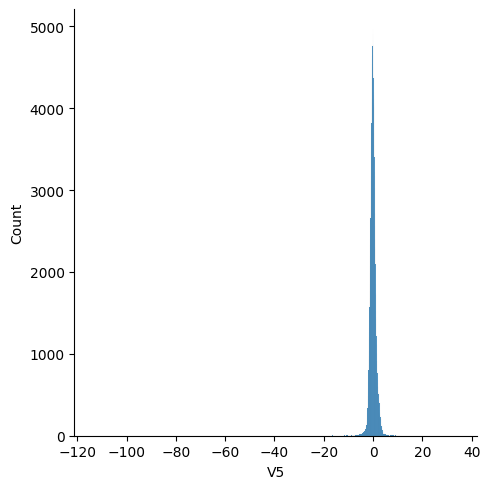

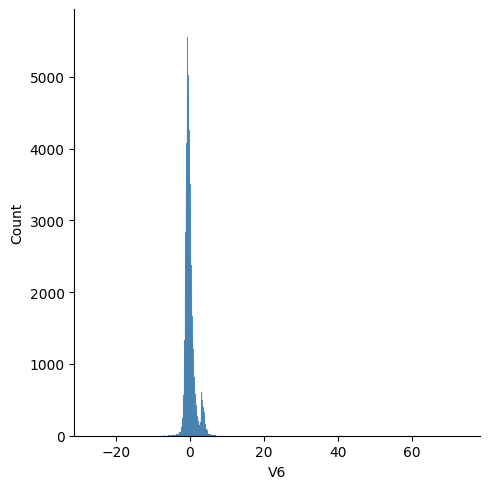

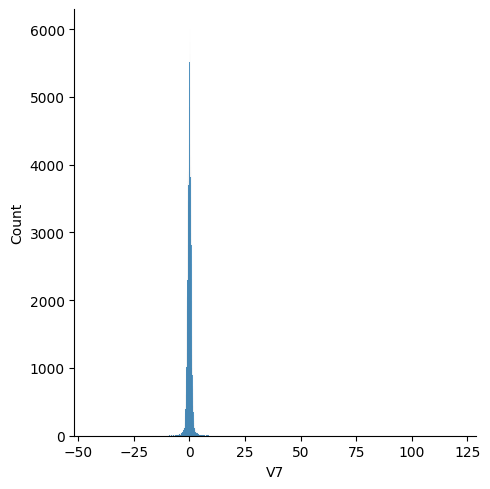

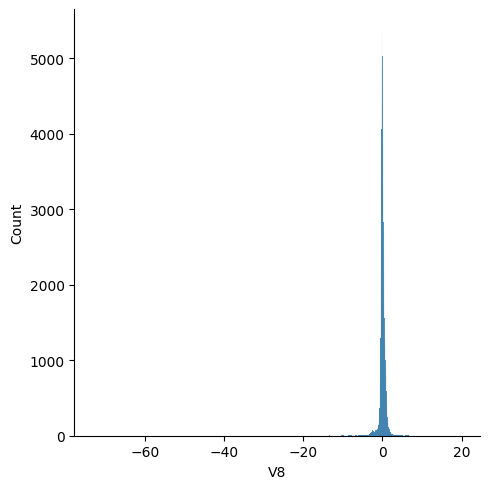

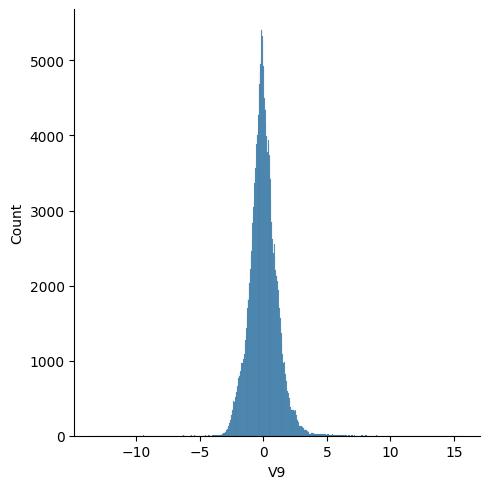

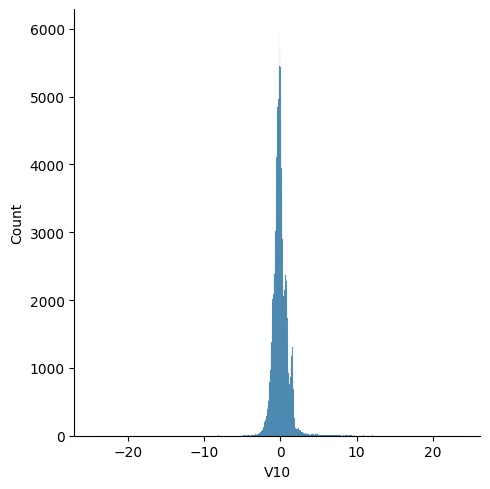

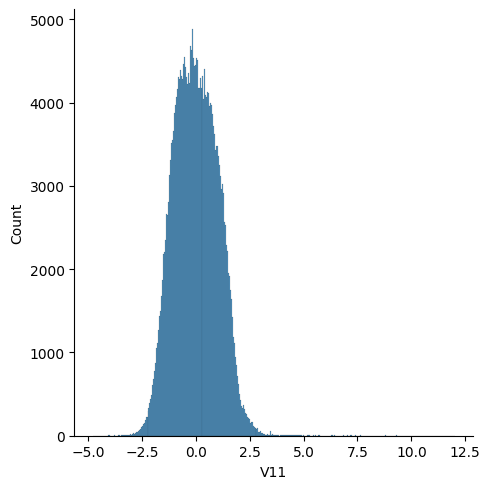

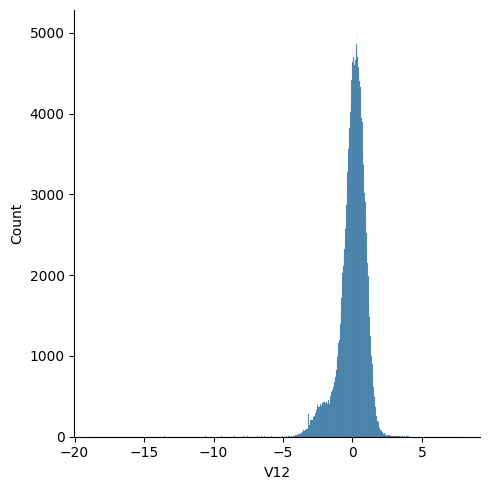

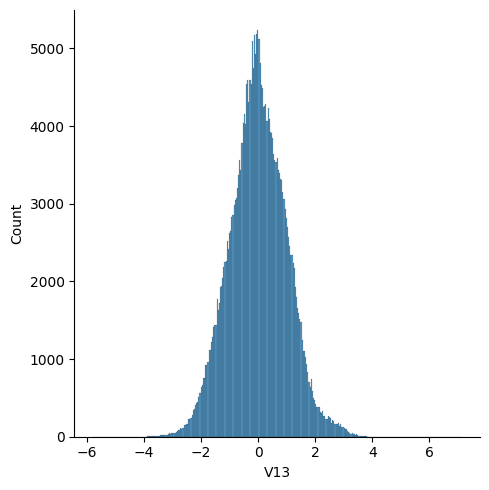

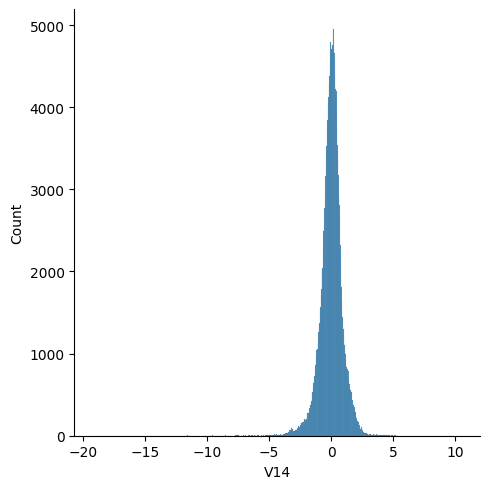

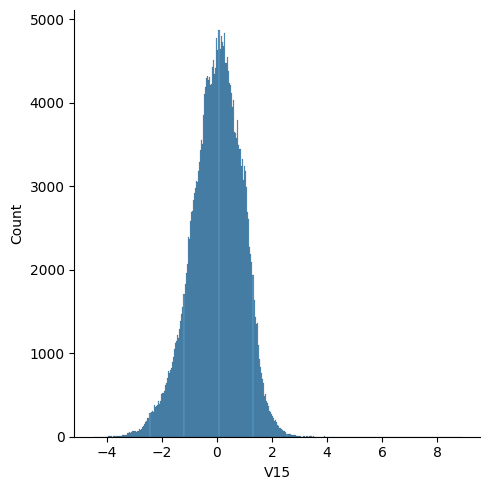

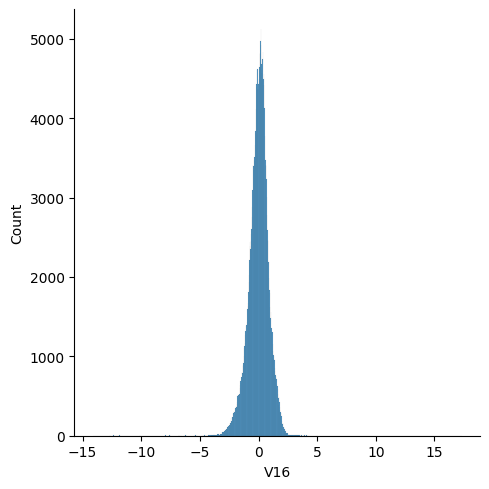

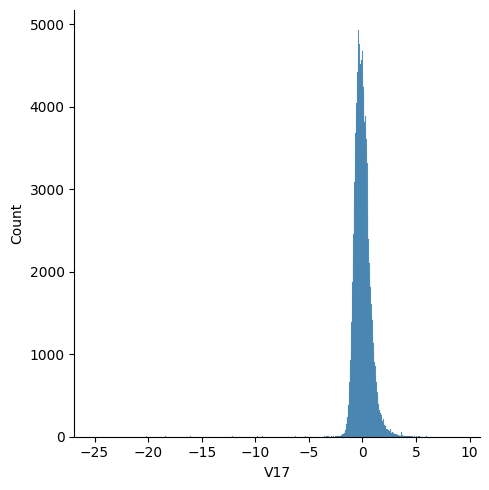

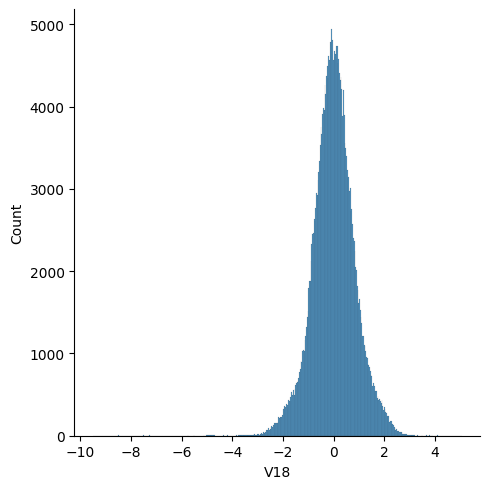

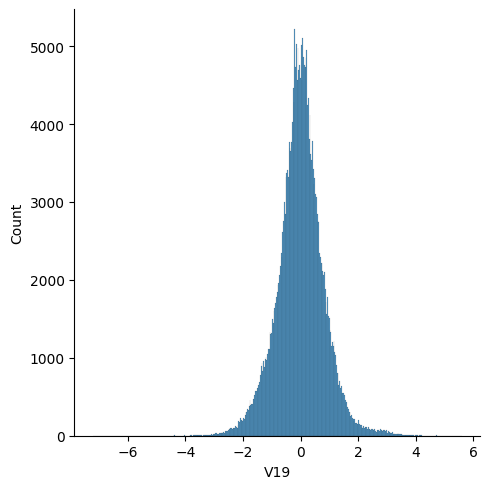

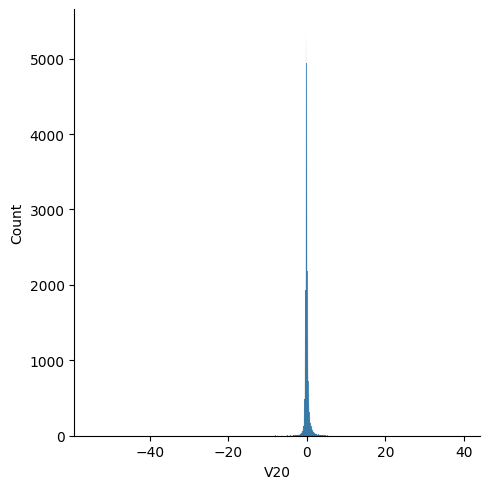

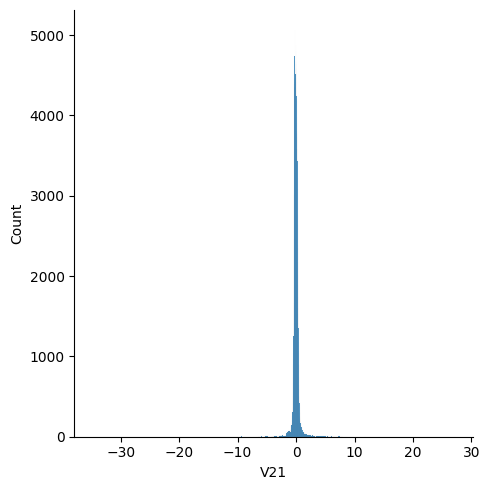

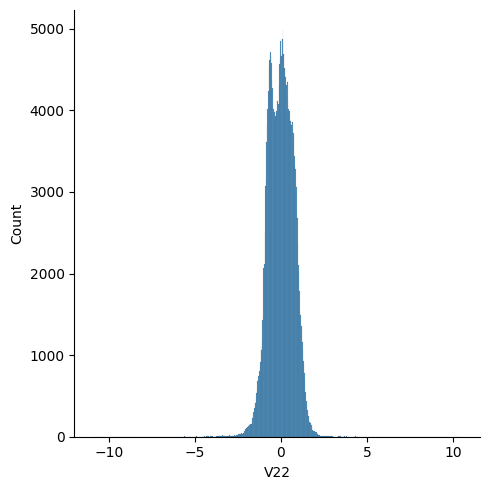

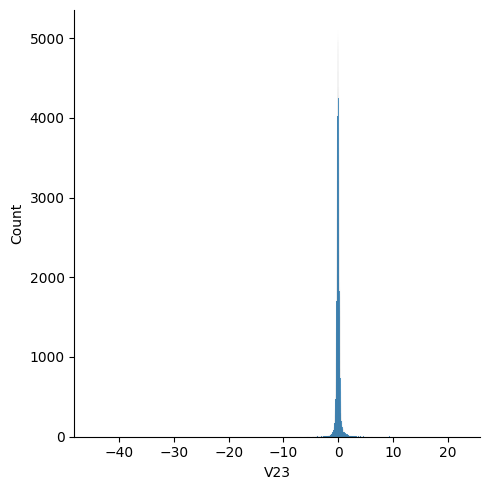

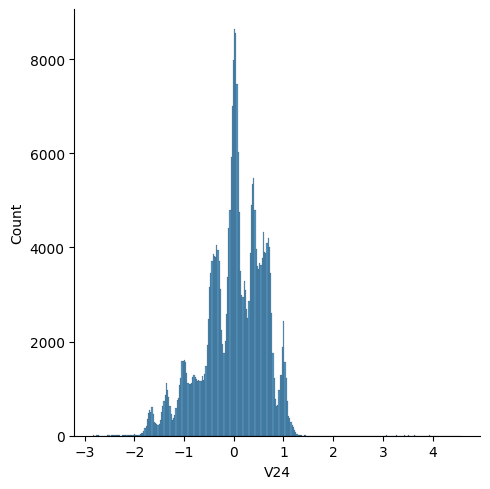

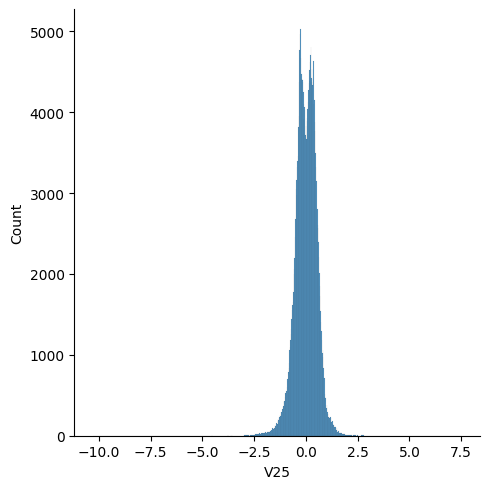

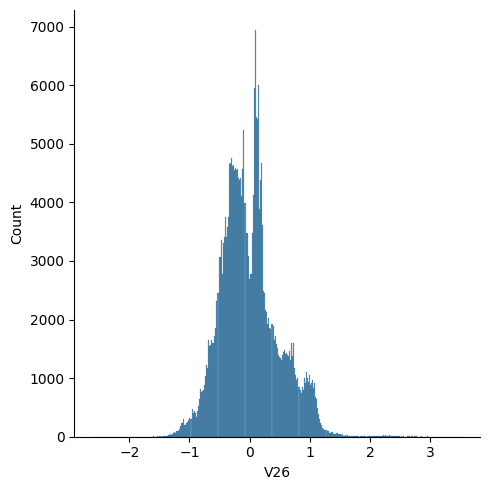

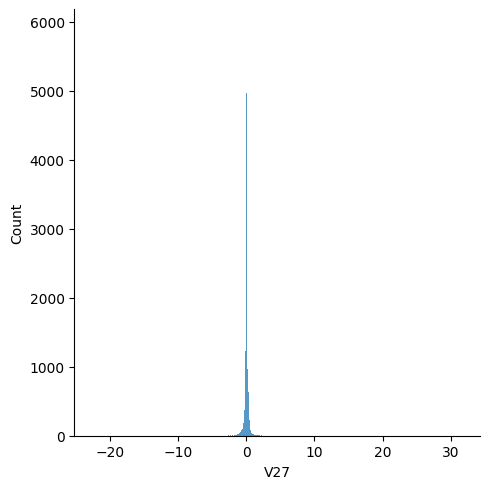

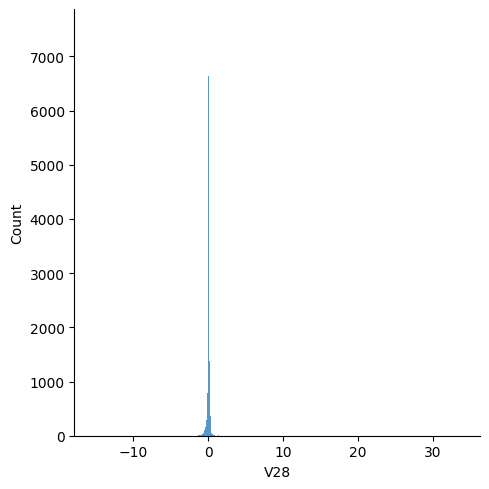

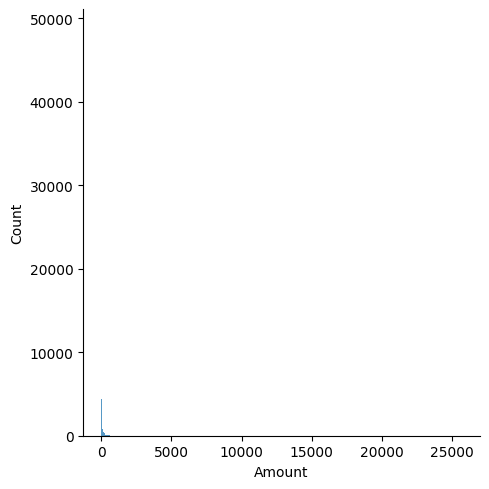

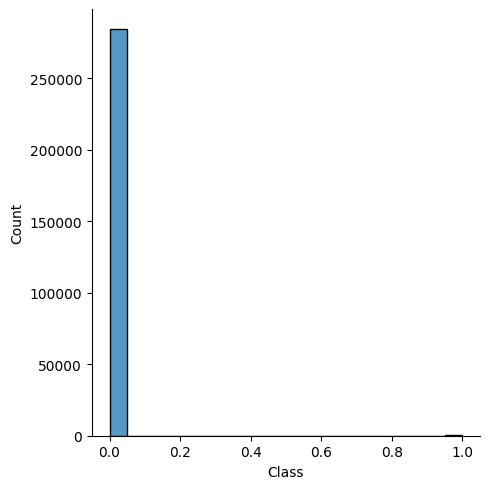

In [10]:
for i in data.columns:
    sns.displot(data[i])
    plt.show()

Here we can observe that the hole dataset has no skewness and kurtosis means the data has been equally dispatured on both sides . so no need to standardize the dataset, directly we can implement preprocessing techinques on dataset.

Here the dataset contains all nuerical columns, so no need to implement the labelencoding techinque on the dataset

# Preprocessing The data

In [11]:
# seperating Features and target

x = data.drop('Class', axis=1)
y = data['Class']

#### Apply SMOTE to handle imbalance

In [12]:
# checking umbalanaced data in the dataset

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

print(f'Original dataset shape: {x.shape}')
print(f'Resampled dataset shape: {x_resampled.shape}')

Original dataset shape: (284807, 30)
Resampled dataset shape: (568630, 30)


# Model selection

In [13]:
#model selection for splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (454904, 30)
y_train (454904,)
x_test (113726, 30)
y_test (113726,)


# Model Building

In [14]:
#Here i am choosing Logistic Regression for clasiffication problem

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_test_pred = LR.predict(x_test)

# Model Evaluation¶
here i am using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses

classification_report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.97     56750
           1       0.98      0.97      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



accuracy_socre: 0.9739021859557181


confusion_matrix:
 [[55736  1014]
 [ 1954 55022]]


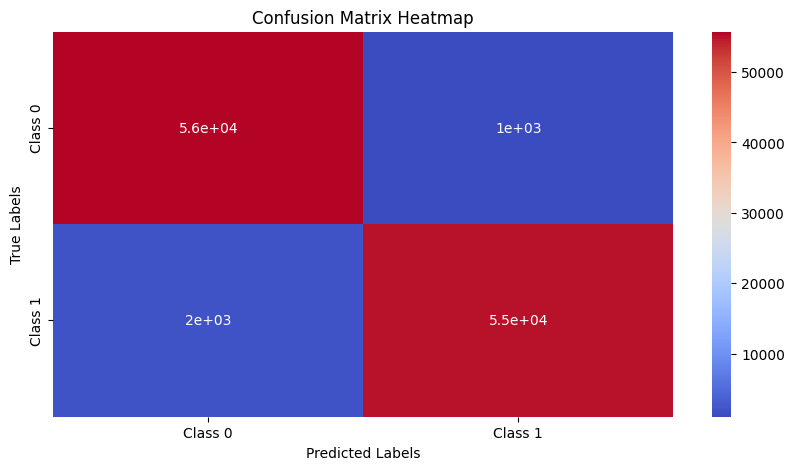

In [15]:
# Create a heatmap visualization
print('classification_report:\n\n',classification_report(y_test,y_test_pred))

print("\n\naccuracy_socre:",accuracy_score(y_test,y_test_pred))

con_mat = confusion_matrix(y_test, y_test_pred)
print("\n\nconfusion_matrix:\n",con_mat)
plt.figure(figsize=(10,5))
sns.heatmap(con_mat, annot=True, cmap="coolwarm", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Conclusion
This project demonstrates the use of logistic regression for fraud detection, a critical task in financial sectors. The model performed well with high accuracy and balanced precision-recall, making it reliable for detecting fraudulent activities. While logistic regression is interpretable and efficient, further enhancements could be made using more complex models such as Random Forests, XGBoost, or neural networks, especially in cases of severe class imbalance or nonlinear relationships.

The end-to-end pipeline from data preprocessing to evaluation ensures the model's reproducibility and clarity, providing a solid foundation for further experimentation or deployment in real-world systems.